## Problem 1
## 1(a)

In [2]:
# Import packages
import numpy as np
import pandas as pd
import scipy.stats as sts
import os
import matplotlib.pyplot as plt
import scipy.optimize as opt
import warnings
warnings.filterwarnings('ignore')
from scipy import special
from scipy.integrate import quad

In [3]:
# Load data
path = '/Users/Sophia/Desktop/BootCamp2017/ProbSets/Econ/wk4_hw'
data1 = np.loadtxt(os.path.join(path, 'data','clms.txt'))
data1.shape

(10619,)

In [4]:
# Descriptive Statistics
print("Mean: {}".format("%.2f" %data1.mean()))
print("Median: {}".format("%.2f" %np.median(data1)))
print("Maximum: {}".format("%.2f" %data1.max()))
print("Minimum: {}".format("%.2f" %data1.min()))
print("Standard Deviation: {}".format("%.2f" %data1.std()))

Mean: 720.28
Median: 172.21
Maximum: 227967.25
Minimum: 0.01
Standard Deviation: 3972.66


<IPython.core.display.Javascript object>


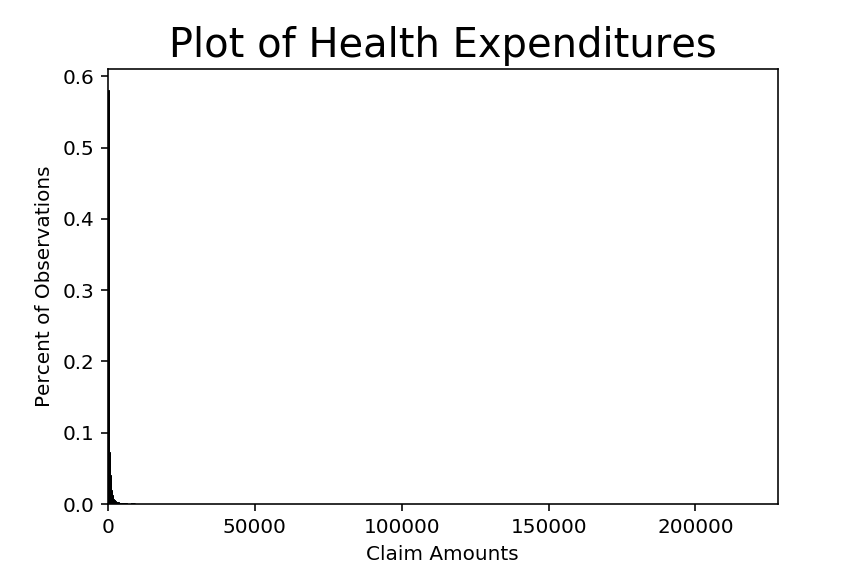

1.0


In [5]:
# Plots
%matplotlib notebook
weights = (1 / data1.shape[0]) * np.ones_like(data1)
n, bins, ignored = plt.hist(data1, 1000, weights=weights, edgecolor='black',
                                linewidth=0.5)
plt.title('Plot of Health Expenditures', fontsize=20)
plt.xlabel('Claim Amounts')
plt.ylabel('Percent of Observations')
plt.xlim(0, data1.max())  
print(n.sum()) # check the sum of frequency is correct

<IPython.core.display.Javascript object>


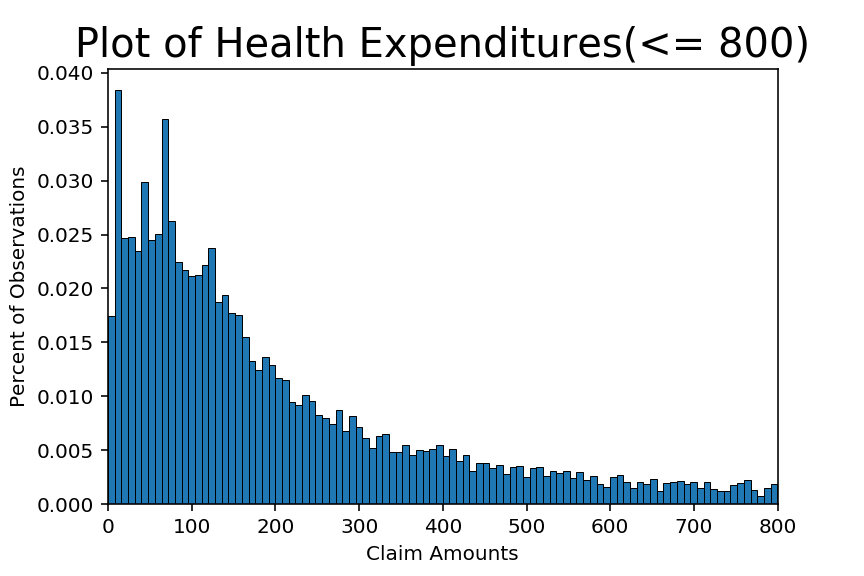

(0, 800)

In [6]:
%matplotlib notebook
data_part = np.asarray([x for x in data1 if x <=800])
weights = (1 / data1.shape[0]) * np.ones_like(data_part)
n, bins, ignored = plt.hist(data_part, 100, weights=weights, edgecolor='black',
                                linewidth=0.5)
plt.title('Plot of Health Expenditures(<= 800)', fontsize=20)
plt.xlabel('Claim Amounts')
plt.ylabel('Percent of Observations')
plt.xlim(0, 800) 

I might prefer the second histogram because it contains much more useful information about the distribution. Since there are extreme outliers in the data, plotting the whole range makes where the majority of the points lie unclear.

## 1(b) Gamma Distribution

In [7]:
# Define functions
def GA_pdf(xvals, alpha, beta):

    pdf_vals = 1/((beta ** alpha) * special.gamma(alpha)) * (xvals ** (alpha - 1)) * np.exp(-xvals/beta)
    return pdf_vals

def log_lik_GA(xvals, alpha, beta):
  
    pdf_vals = GA_pdf(xvals, alpha, beta)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

def crit(params, args):
    
    alpha, beta = params
    xvals = args
    log_lik_val = log_lik_GA(xvals, alpha, beta)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [8]:
# Find maximized log-likelihood
beta_init = (data1.var())/data1.mean()
alpha_init = data1.mean()/beta_init  

params_init = (alpha_init, beta_init) # Initial guess

ga_args = data1
bnds = ((1e-6, None), (1e-6, None))
results = opt.minimize(crit, params_init, args=(ga_args), method ='L-BFGS-B', bounds=bnds)
alpha_ga, beta_ga = results.x
print(results)

      fun: 82076.451605662558
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.        ,  0.09022187])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 8
   status: 0
  success: True
        x: array([  2.21755323e-01,   2.19110647e+04])


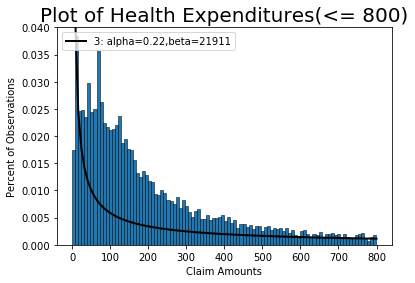

In [9]:
# Plots
%matplotlib inline

data_part = np.asarray([x for x in data1 if x <=800])
weights = (1 / data1.shape[0]) * np.ones_like(data_part)
n, bins, ignored = plt.hist(data_part, 100, weights=weights, edgecolor='black',
                                linewidth=0.5)
plt.title('Plot of Health Expenditures(<= 800)', fontsize=20)
plt.xlabel('Claim Amounts')
plt.ylabel('Percent of Observations')

x = np.linspace(1e-10, 800, 100)
y = 8 * GA_pdf(x, alpha_ga, beta_ga)
plt.plot(x, y,'k-',
         linewidth=2, label='3: alpha=0.22,beta=21911')
plt.legend(loc='upper left')
plt.ylim(0, 0.04)

plt.show()

## 1(c) Generalized Gamma Distribution

In [10]:
def GG_pdf(xvals, alpha, beta, m):

    pdf_vals = m/((beta**alpha)*special.gamma(alpha/m))*(xvals**(alpha - 1))*np.exp(-(xvals/beta)**m)
    return pdf_vals

def log_lik_GG(xvals, alpha, beta, m):
  
    pdf_vals = GG_pdf(xvals, alpha, beta, m)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

def crit_GG(params, args):
    
    alpha, beta, m = params
    xvals = args
    log_lik_val = log_lik_GG(xvals, alpha, beta, m)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [11]:
beta_init = beta_ga
alpha_init = alpha_ga
m_init = 1

params_init = (alpha_init, beta_init, m_init) # Initial guess

gg_args = data1
bnds = ((1e-6, None), (1e-6, None), (1e-6, None))
results = opt.minimize(crit_GG, params_init, args=(gg_args), method ='L-BFGS-B', bounds=bnds)
alpha_gg, beta_gg, m_gg = results.x
print(results)

      fun: 82076.446790848655
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.65253072,  0.09167707, -1.04337232])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 24
      nit: 2
   status: 0
  success: True
        x: array([  2.21737619e-01,   2.19110644e+04,   9.97091566e-01])


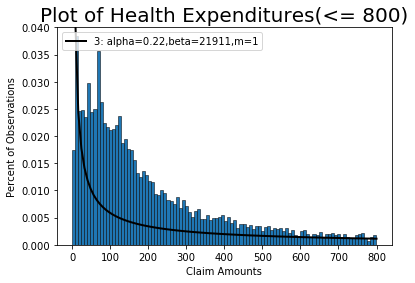

In [12]:
# Plots
%matplotlib inline

data_part = np.asarray([x for x in data1 if x <=800])
weights = (1 / data1.shape[0]) * np.ones_like(data_part)
n, bins, ignored = plt.hist(data_part, 100, weights=weights, edgecolor='black',
                                linewidth=0.5)
plt.title('Plot of Health Expenditures(<= 800)', fontsize=20)
plt.xlabel('Claim Amounts')
plt.ylabel('Percent of Observations')

x = np.linspace(1e-10, 800, 100)
y = 8 * GG_pdf(x, alpha_gg, beta_gg, m_gg)
plt.plot(x, y,'k-',
         linewidth=2, label='3: alpha=0.22,beta=21911,m=1')
plt.legend(loc='upper left')
plt.ylim(0, 0.04)

plt.show()

## 1(d) Generalized Beta 2 Distribution

In [13]:
def GB2_pdf(xvals, a, b ,p, q):
    x = a*xvals**(a*p-1)
    y = (b**(a*p))*special.beta(p,q)*((1+(xvals/b)**a)**(p+q))
    pdf_vals = x/y
    return pdf_vals

def log_lik_GB2(xvals, a, b, p, q):
  
    pdf_vals = GB2_pdf(xvals, a, b, p, q)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

def crit_GB2(params, args):
    
    a, b, p, q = params
    xvals = args
    log_lik_val = log_lik_GB2(xvals, a, b, p, q)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [14]:
q_init = 6300
a_init = m_gg
b_init = q_init**(1/a_init)*beta_gg
p_init = alpha_gg/m_gg

params_init = (a_init, b_init, p_init, q_init) # Initial guess

gb2_args = data1
bnds = ((1e-6, None), (1e-6, None), (1e-6, None), (1e-6, None))
results = opt.minimize(crit_GB2, params_init, args=(gb2_args), method ='L-BFGS-B', bounds=bnds)
a_gb2, b_gb2, p_gb2, q_gb2 = results.x
print(results)

      fun: 76399.212341832754
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.54658516,  0.        , -1.7680577 ,  9.55478754])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 145
      nit: 15
   status: 0
  success: True
        x: array([  6.83248767e-01,   1.41607543e+08,   1.04428293e+00,
         6.29858153e+03])


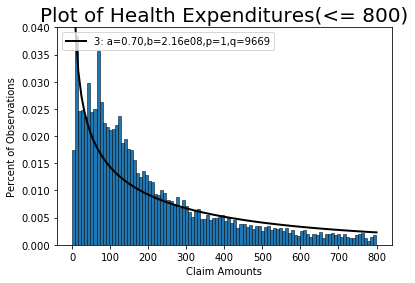

In [15]:
# Plots
%matplotlib inline

data_part = np.asarray([x for x in data1 if x <=800])
weights = (1 / data1.shape[0]) * np.ones_like(data_part)
n, bins, ignored = plt.hist(data_part, 100, weights=weights, edgecolor='black',
                                linewidth=0.5)
plt.title('Plot of Health Expenditures(<= 800)', fontsize=20)
plt.xlabel('Claim Amounts')
plt.ylabel('Percent of Observations')

x = np.linspace(1e-10, 800, 100)
y = 8 * GB2_pdf(x, a_gb2, b_gb2, p_gb2, q_gb2)
plt.plot(x, y,'k-',
         linewidth=2, label='3: a=0.70,b=2.16e08,p=1,q=9669')
plt.legend(loc='upper left')
plt.ylim(0, 0.04)

plt.show()

## 1(e) Hypothesis Testing

In [17]:
GB2 = log_lik_GB2(data1, a_gb2, b_gb2, p_gb2, q_gb2)
GG = log_lik_GG(data1, alpha_gg, beta_gg, m_gg)
GA = log_lik_GA(data1, alpha_ga, beta_ga)
GG_val = abs(2 * (GG - GB2))
GA_val = abs(2 * (GA - GB2))
pval_GG = 1.0 - sts.chi2.cdf(GA_val, 4)
pval_GA = 1.0 - sts.chi2.cdf(GA_val, 4)
print('chi squared of H0 with 4 degrees of freedom p-value (Generalized Gamma Distribution) = ', pval_GG)
print('chi squared of H0 with 4 degrees of freedom p-value (Gamma Distribution) = ', pval_GA)

chi squared of H0 with 4 degrees of freedom p-value (Generalized Gamma Distribution) =  0.0
chi squared of H0 with 4 degrees of freedom p-value (Gamma Distribution) =  0.0


## 1(f) Prediction

In [20]:
g1 = lambda x: GB2_pdf(x, a_gb2, b_gb2, p_gb2, q_gb2)
g2 = lambda x: GA_pdf(x, alpha_ga, beta_ga)
print("Prediction from GB2: "+ str(quad(g1, 1000, np.inf)[0]))
print("Prediction from GA: "+ str(quad(g2, 1000, np.inf)[0]))

Prediction from GB2: 0.15961843784223362
Prediction from GA: 0.45195974447843174
